In [1]:
import pandas as pd
from random import randint,uniform

In [2]:
data = []
cols = ['a','b','c','d','y']
for i in range(500):
    y = randint(0,3)
    if y==0:
        a = randint(1,10)
        b = uniform(1,2)
        c = 10+(uniform(0,1)*10)
        d = 100+(uniform(0,1)*100)
    elif y==1:
        a = randint(11,20)
        b = uniform(3,4)
        c = 20+(uniform(0,1)*10)
        d = 200+(uniform(0,1)*100)
    elif y==2:
        a = randint(21,30)
        b = uniform(5,6)
        c = 30+(uniform(0,1)*10)
        d = 300+(uniform(0,1)*100)
    else:
        a = randint(31,40)
        b = uniform(7,8)
        c = 40+(uniform(0,1)*10)
        d = 400+(uniform(0,1)*100)
    data.append([a,b,c,d,y])
df = pd.DataFrame(data,columns=cols)

In [3]:
print(df)

      a         b          c           d  y
0    40  7.356933  41.584464  452.114312  3
1    14  3.840079  24.085990  296.246837  1
2     1  1.025302  18.696622  192.652438  0
3    34  7.828838  41.562738  467.125109  3
4    40  7.816226  40.784067  451.874689  3
..   ..       ...        ...         ... ..
495  36  7.667655  46.686134  483.536076  3
496  19  3.009995  20.040089  278.002883  1
497   1  1.138841  14.114325  102.839791  0
498  13  3.703112  28.404707  222.732273  1
499  40  7.929879  48.391522  423.454686  3

[500 rows x 5 columns]


In [4]:
data = df[['a','b','c','d']]

In [5]:
label = df['y']

In [6]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data, label, test_size=0.10, random_state=42)

In [7]:
from sklearn import tree

In [8]:
clf = tree.DecisionTreeClassifier()

In [9]:
clf.fit(train_x,train_y)

DecisionTreeClassifier()

In [10]:
pred_y = clf.predict(test_x)

In [11]:
pred_y

array([3, 3, 0, 3, 3, 3, 0, 3, 2, 3, 1, 0, 1, 0, 3, 1, 3, 2, 1, 2, 2, 2,
       2, 3, 3, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 3, 0, 3, 3, 1, 0, 3, 1, 0,
       1, 2, 3, 0, 3, 2], dtype=int64)

In [13]:
test_y

361    3
73     3
374    0
155    3
104    3
394    3
377    0
124    3
68     2
450    3
9      1
194    0
406    1
84     0
371    3
388    1
495    3
30     2
316    1
408    2
490    2
491    2
280    2
356    3
76     3
461    0
497    0
211    2
101    1
334    0
475    1
336    0
440    1
173    0
2      0
333    3
409    0
70     3
209    3
63     1
384    0
93     3
485    1
185    0
33     1
77     2
0      3
11     0
415    3
22     2
Name: y, dtype: int64

In [14]:
from sklearn.metrics import accuracy_score
score = accuracy_score(test_y,pred_y)
print(score)

1.0


[Text(0.6, 0.875, 'x[2] <= 40.227\ngini = 0.749\nsamples = 450\nvalue = [108.0, 115.0, 105.0, 122.0]'),
 Text(0.4, 0.625, 'x[2] <= 19.993\ngini = 0.666\nsamples = 328\nvalue = [108, 115, 105, 0]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 108\nvalue = [108, 0, 0, 0]'),
 Text(0.6, 0.375, 'x[0] <= 20.5\ngini = 0.499\nsamples = 220\nvalue = [0, 115, 105, 0]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 115\nvalue = [0, 115, 0, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 105\nvalue = [0, 0, 105, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 122\nvalue = [0, 0, 0, 122]')]

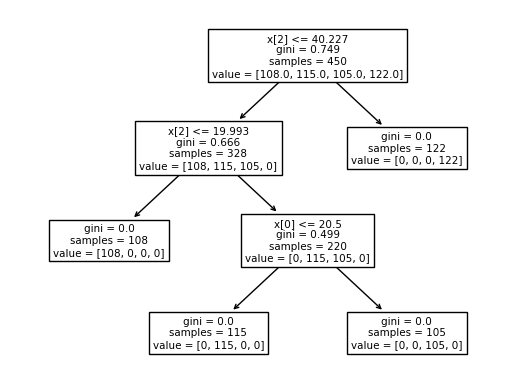

In [15]:
tree.plot_tree(clf.fit(train_x,train_y))

In [13]:
from sklearn.tree.export import export_text
r = export_text(clf.fit(train_x,train_y))
print(r)

|--- feature_1 <= 2.50
|   |--- class: 0
|--- feature_1 >  2.50
|   |--- feature_3 <= 300.04
|   |   |--- class: 1
|   |--- feature_3 >  300.04
|   |   |--- feature_2 <= 39.99
|   |   |   |--- class: 2
|   |   |--- feature_2 >  39.99
|   |   |   |--- class: 3



/home/wirarama/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)
